In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats

import itertools

Ik ga nu de volledige dataset van student_performance analyseren. Het doel is om uiteindelijk een machine learning model te trainen die kan voorspellen wat de waarde van G3 gaat zijn aan de hand van eerdere data. Om dit te kunnen doen ga ik hieronder eerst de dataset inlezen.

In [2]:
df = pd.read_csv('student_performance_gevorderd.csv', sep=',')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,course
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,...,3,4,1,1,3,6,5,6,6,mat
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,...,3,3,1,1,3,4,5,5,6,mat
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,...,3,2,2,3,3,10,7,8,10,mat
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,services,...,2,2,1,1,5,2,15,14,15,mat
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,...,3,2,1,2,5,4,6,10,10,mat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19.0,R,GT3,T,2.0,3.0,services,other,...,4,2,1,2,5,4,10,11,10,por
1040,MS,F,18.0,U,LE3,T,3.0,1.0,teacher,services,...,3,4,1,1,1,4,15,15,16,por
1041,MS,F,18.0,U,GT3,T,1.0,1.0,other,other,...,1,1,1,1,5,6,11,12,9,por
1042,MS,M,17.0,U,LE3,T,NaN,NaN,services,services,...,4,5,3,4,2,6,10,10,10,por


Hieronder toon ik de verschillende datatypes die pandas toekent aan de variabelen

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      1044 non-null   object 
 1   sex         1044 non-null   object 
 2   age         1023 non-null   float64
 3   address     1044 non-null   object 
 4   famsize     1044 non-null   object 
 5   Pstatus     1044 non-null   object 
 6   Medu        1016 non-null   float64
 7   Fedu        1016 non-null   float64
 8   Mjob        1044 non-null   object 
 9   Fjob        1044 non-null   object 
 10  reason      1044 non-null   object 
 11  guardian    971 non-null    object 
 12  traveltime  1044 non-null   int64  
 13  studytime   1044 non-null   int64  
 14  failures    1044 non-null   int64  
 15  schoolsup   1044 non-null   object 
 16  famsup      1044 non-null   object 
 17  paid        1044 non-null   object 
 18  activities  1044 non-null   object 
 19  nursery     1044 non-null  

De afhankelijke variabelen in deze dataset zijn: 'G1', 'G2' en 'G3'. verder heb je nominale, ordinale categorische, ordinale numerieke en ratio numerieke variabelen.Op guardian na zijn alle variabelen gevuld en zijn er geen missende waarden. 

In [4]:
nom_vars = ["school", "sex", "address", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "famsize", "famsup", "paid", "schoolsup", "activities", "nursery", "higher", "internet", "romantic"]
ord_num_vars = ["failures", "traveltime", "studytime", "Medu", "Fedu", "famrel", "freetime", "goout", "Dalc", "Walc", "health"]
ratio_num_vars = ['age', "absences"]
num_vars = ["failures", "traveltime", "studytime", "Medu", "Fedu", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "age", "absences"]
cat_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

## Individuele variabelen

De afhankelijke variabelen in deze dataset zijn 'G1''G2' en 'G3'. Deze variabelen ga ik hieronder onderzoeken.

### Frequentieverdeling G1

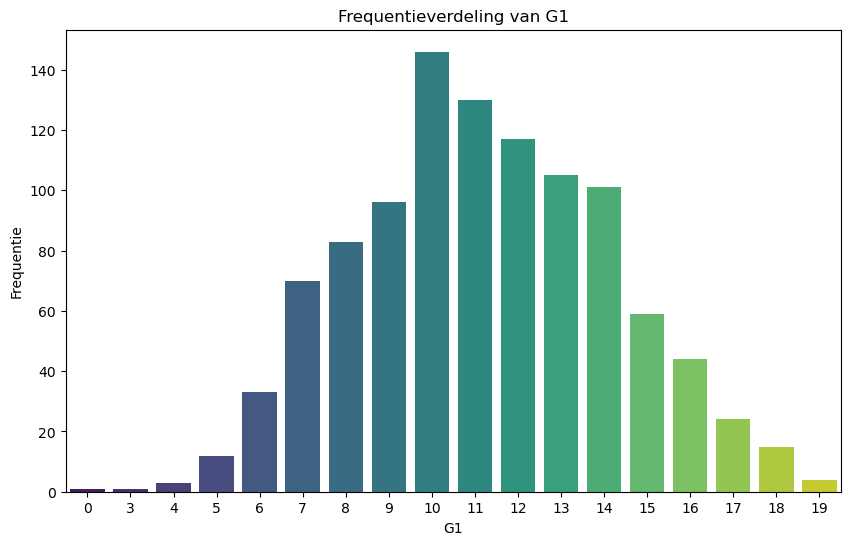

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(x='G1', data=df, palette='viridis')
plt.title(f'Frequentieverdeling van G1')
plt.xlabel('G1')
plt.ylabel('Frequentie')
plt.show()

### Frequentieverdeling G2

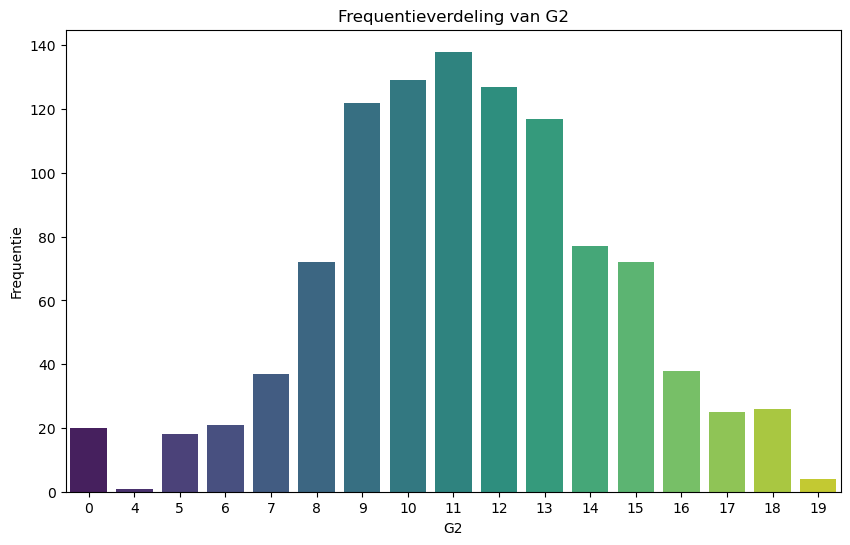

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='G2', data=df, palette='viridis')
plt.title(f'Frequentieverdeling van G2')
plt.xlabel('G2')
plt.ylabel('Frequentie')
plt.show()

### Frequentieverdeling G3

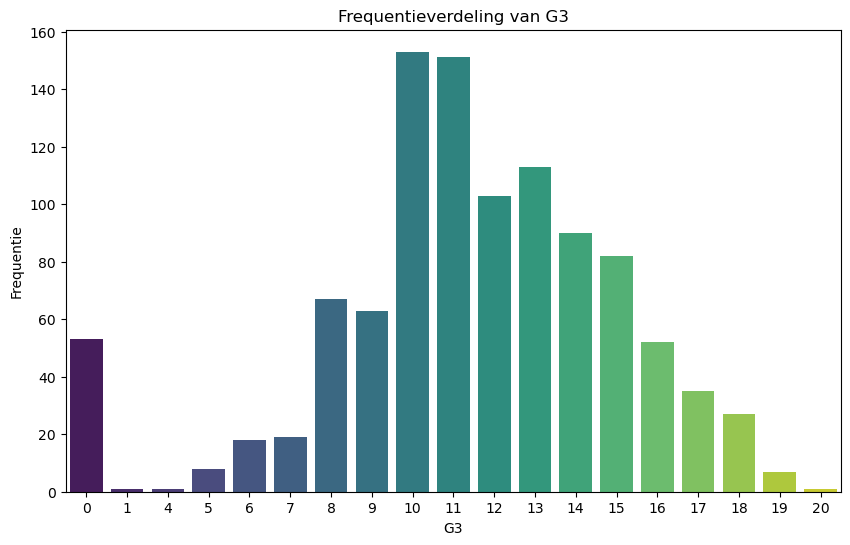

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='G3', data=df, palette='viridis')
plt.title(f'Frequentieverdeling van G3')
plt.xlabel('G3')
plt.ylabel('Frequentie')
plt.show()

### Categorical variables

The categorical variabeles in this dataset are: "school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"

In [8]:
def plot_frequencies(data, vars, var_type, num_cols = 3, ord_cat_var_orders=None, remove_outliers=False):
    num_rows = len(vars) // num_cols
    # Als het aantal variabelen niet deelbaar is door het aantal kolommen
    # dan is er een extra rij nodig.
    if len(vars) % num_cols != 0:
        num_rows += 1

    fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False, figsize=(num_cols * 3, num_rows * 3))

    for i, var in enumerate(vars):
        row = i // num_cols
        col = i % num_cols
        if var_type == "nom" or var_type == "ord_num":
            sns.countplot(ax=ax[row][col], data=data, x=var)
        elif var_type == "ord_cat":
            sns.countplot(ax=ax[row][col], data=data, x=var, order=ord_cat_var_orders[var])
        elif var_type == "num":
            if remove_outliers:
                largest_indices = data.nlargest(columns=var, n=10).index
                # De ~ zorgt ervoor dat we alles nemen behalve de tien grootste.
                sns.histplot(ax=ax[row][col], data=data[~data.index.isin(largest_indices)], x=var)
            else:
                sns.histplot(ax=ax[row][col], data=data, x=var)
        else:
            raise Exception("Unknown var type {}". format(var_type))

        # draai de x-labels als er meer dan 5 labels zijn
        if len(ax[row][col].get_xticklabels()) > 5:
            ax[row][col].tick_params(axis='x', labelrotation=90)

    plt.tight_layout()
    plt.show()

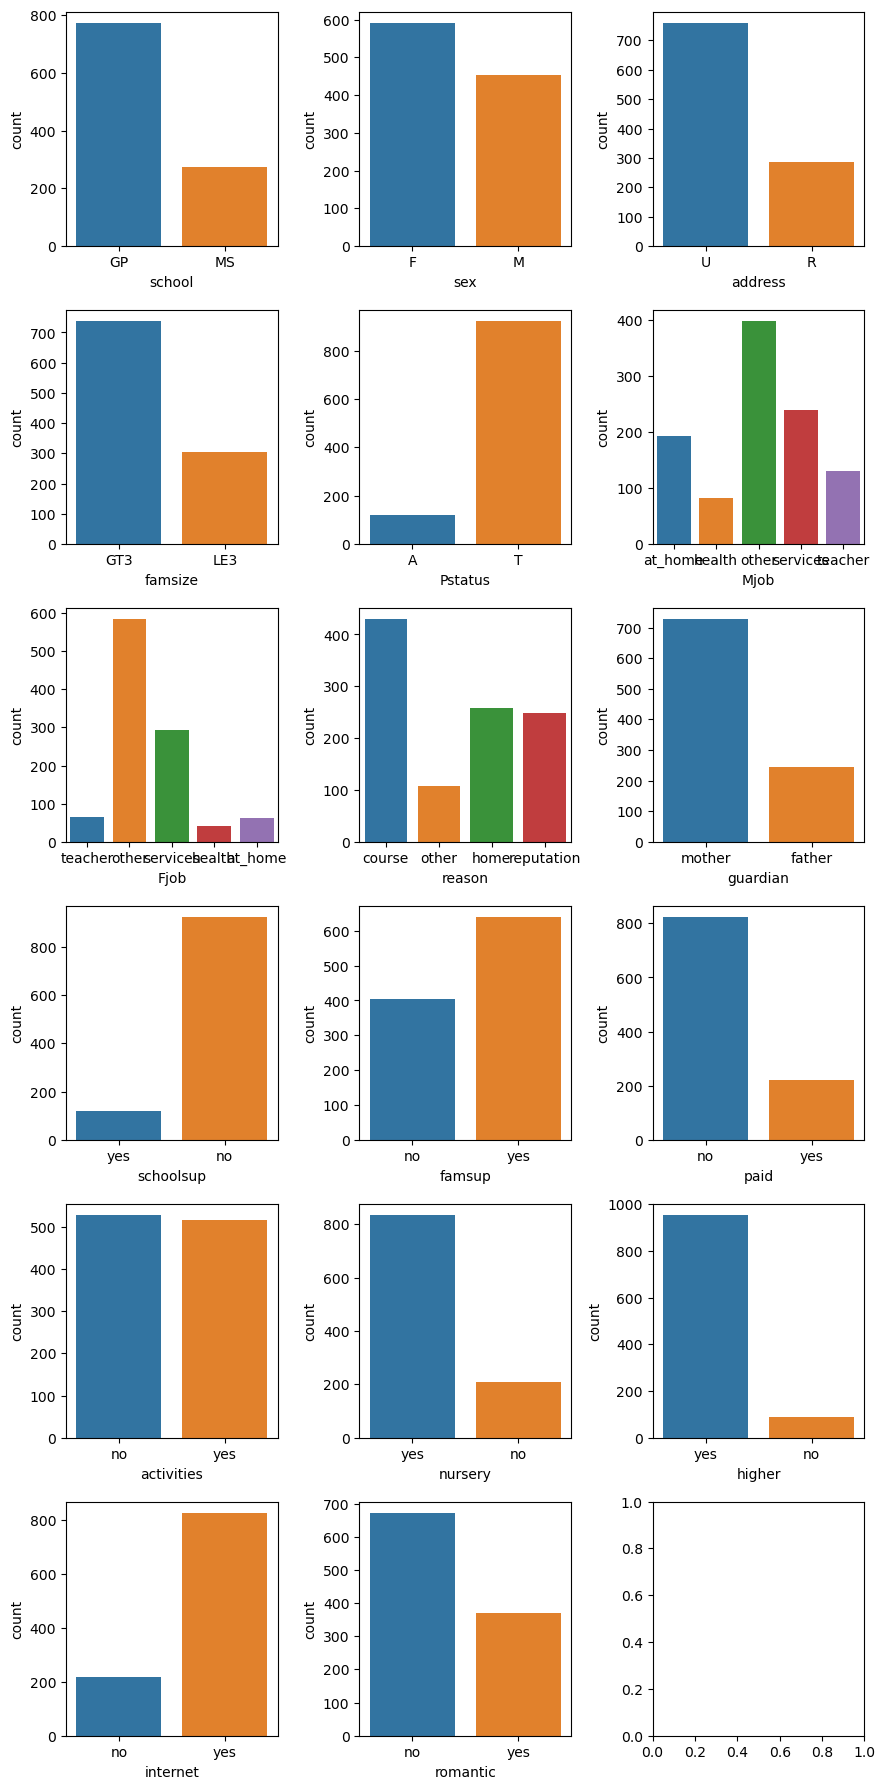

In [9]:
plot_frequencies(df, cat_vars, "nom")

### Numerical variables

The numerical variables in this dataset are: "failures", "traveltime", "studytime", "Medu", "Fedu", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "age", "absences"

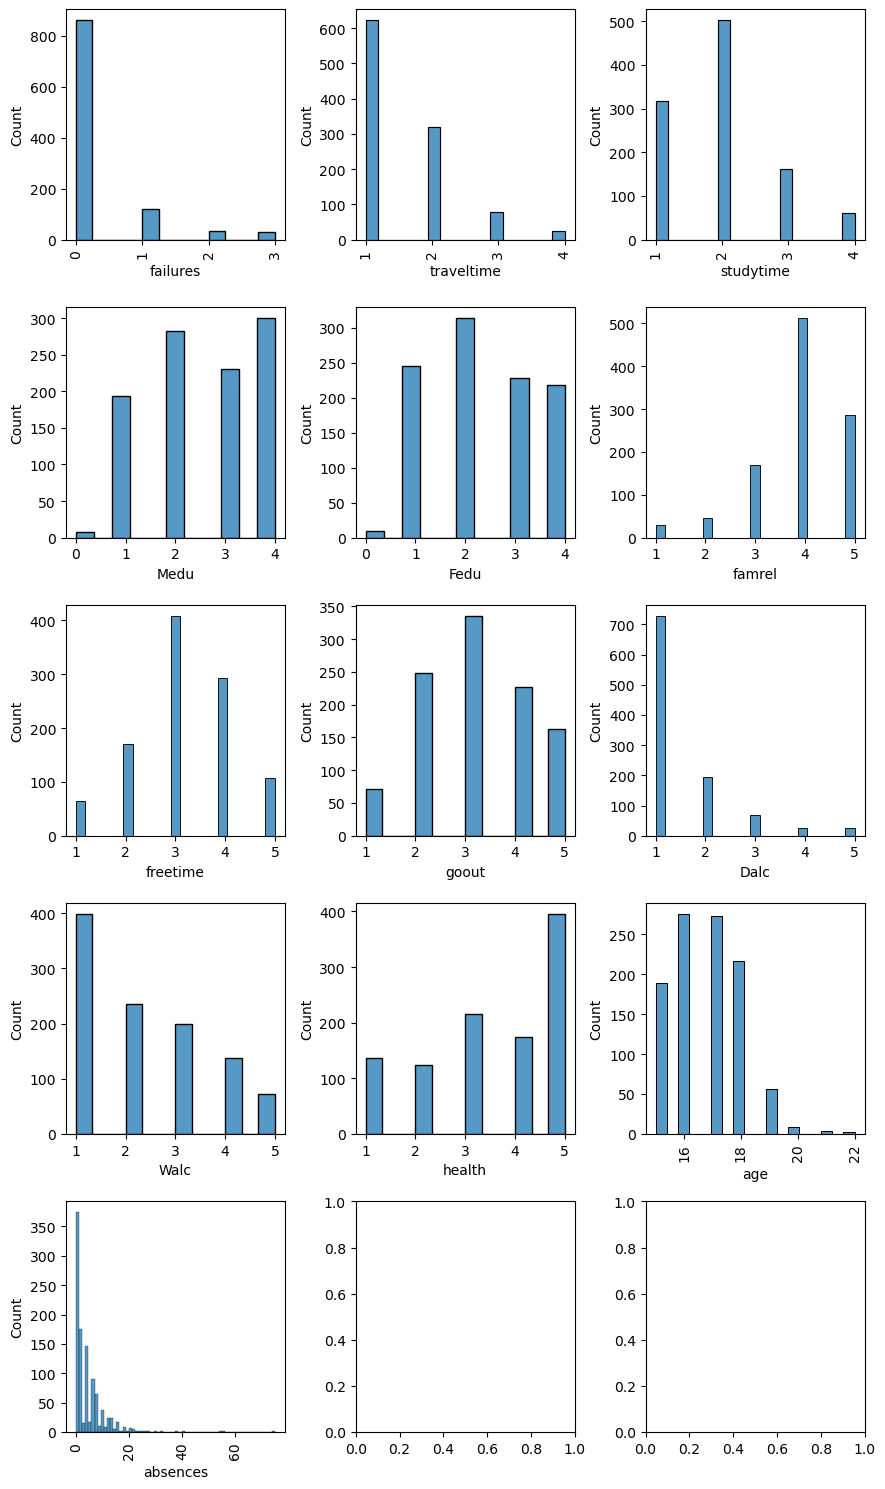

In [10]:
plot_frequencies(df, num_vars, "num")

In [11]:
nom_vars = ["school", "sex", "address", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "famsize", "famsup", "paid", "schoolsup", "activities", "nursery", "higher", "internet", "romantic"]
ord_num_vars = ["failures", "traveltime", "studytime", "Medu", "Fedu", "famrel", "freetime", "goout", "Dalc", "Walc", "health"]
ratio_num_vars = ['age', "absences"]
ord_cat_vars = ['famsize']
num_vars = ["failures", "traveltime", "studytime", "Medu", "Fedu", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "age", "absences"]
cat_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

In [12]:
ord_cat_var_orders = { 'famsize': ['LE3', 'GT3']}

In [13]:
class CustomOrdinalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, ord_cat_vars, ord_cat_var_orders):
        self.ord_cat_vars = ord_cat_vars
        self.ord_cat_var_orders = ord_cat_var_orders

    def fit(self, X, y=None):
        # Er valt niets te fitten.
        return self

    def transform(self, X, y=None):
        for var in self.ord_cat_vars:
            # In ord_cat_var_orders[var] vinden we een gesorteerde lijs met waarden.
            # Bijvoorbeeld ['Po', 'Fa', 'TA', 'Gd', 'Ex'] voor de variabele ExterQual
            # We willen dat omzetten naar een mapper die er zo uit ziet:
            # {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
            # Merk op dat we beginnen bij 1 en niet bij 0. De 0 gebruiken we later voor missing values.
            ordered_categories = self.ord_cat_var_orders[var]
            # We zetten het dictionary op met list comprehension.
            mapper = {cat: i + 1 for i, cat in enumerate(ordered_categories)}
            # Tenslotte voeren we de codering daadwerkelijk uit.
            X[var] = X[var].map(mapper)
        return X

customOrdinalEncoder = CustomOrdinalEncoder(ord_cat_vars, ord_cat_var_orders)

student_performance_ord_encoded = customOrdinalEncoder.fit_transform(df.copy())
student_performance_ord_encoded[ord_cat_vars]

,famsize
0,2
1,2
2,1
3,2
4,2
...,...
1039,2
1040,1
1041,2
1042,1


In [14]:
X_vars = cat_vars + num_vars

X = df[X_vars]

len(X_vars), len(df.columns)

(30, 34)

### Missing Values

In deze dataset zitten geen nullable values. Vaak zijn nullable variabelen leeg omdat het niet van toepassing is. De reden dat deze dataset geen nullable variabelen heeft is omdat veel variabelen binary zijn. Als er dan iets niet van toepassing is, is de waarde 'no'.
Om te kijken welke variabelen missing values hebben voer ik de volgende regel code uit:

In [15]:
X.isna().sum().sort_values(ascending=False)

guardian      73
Fedu          28
Medu          28
age           21
school         0
romantic       0
health         0
Walc           0
Dalc           0
goout          0
freetime       0
famrel         0
studytime      0
traveltime     0
failures       0
internet       0
sex            0
higher         0
nursery        0
activities     0
paid           0
famsup         0
schoolsup      0
reason         0
Fjob           0
Mjob           0
Pstatus        0
famsize        0
address        0
absences       0
dtype: int64

De variabelen die missing values hebben in deze dataset zijn dus: 'guardian', 'Medu', 'Fedu', 'age'. 
Medu en Fedu: orderlijke numerieke waarden
guardian: categorische nominale waarde
age: numerieke waarde

Dus er zijn drie numerieke variabelen die missing values hebben, namelijk 'Medu', 'Fedu' en 'age'. Er is een categorische variabele die missing values heeft, namelijk 'guardian'.

Omdat ik een machine learning model wil maken wat voorspellingen kan doen op nieuwe data, moet ik een functie maken die ook eventuele andere missing values van de nieuwe data kan vullen. Hiervoor moeten ik alle variabelen verdelen in categorische en numerieke waarden. Dat heb ik eerder in dit notebook al gedaan.

In [16]:
cat_vars

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [17]:
num_vars

['failures',
 'traveltime',
 'studytime',
 'Medu',
 'Fedu',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'age',
 'absences']

Numerieke missende waarden vullen we met de `mediaan`
Categorische missende waarden vullen we met de `modus`

In [18]:
class CustomImputer(BaseEstimator, TransformerMixin):
    CONSTANT_NUM = 0
    CONSTANT_CAT = "NONE"

    def __init__(self, cat_vars, num_vars):
        self.cat_vars = cat_vars
        self.num_vars = num_vars

    def fit(self, X, y=None):
        # Voor de not nullable categorische variabelen bepalen en bewaren we de modus.
        self.modi = dict()
        for cat_var in self.cat_vars:
            self.modi[cat_var] = X[cat_var].mode()[0]

        # En voor de not nullable numerieke variabelen de mediaan.
        self.medians = dict()
        for num_var in self.num_vars:
            self.medians[num_var] = X[num_var].median()

        return self

    def transform(self, X, y=None):
        # Vul de not nullable categorische variabelen met de gefitte modi.
        for var in self.cat_vars:
            X[var].fillna(self.modi[var], inplace=True)

        # Vul de not nullabele numerieke variabelen met de gefitte mediaan.
        for var in self.num_vars:
            X[var].fillna(self.medians[var], inplace=True)

        return X


customImputer = CustomImputer(
    cat_vars=cat_vars,
    num_vars=num_vars
)

# De CustomImputer gaat ervan uit dat de ordinalen gecodeerd zijn.
# In X zijn de ordinale variabelen nog categorisch. Dus we gebruiken ook de OrdinalEncoder.
# Merk op dat we X kopiëren om X intact te houden.
X_encoded_imputed = customImputer.fit_transform(
    customOrdinalEncoder.fit_transform(X.copy())
)
X_encoded_imputed

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,...,Medu,Fedu,famrel,freetime,goout,Dalc,Walc,health,age,absences
0,GP,F,U,2,A,at_home,teacher,course,mother,yes,...,4.0,4.0,4,3,4,1,1,3,18.0,6
1,GP,F,U,2,T,at_home,other,course,father,no,...,1.0,1.0,5,3,3,1,1,3,17.0,4
2,GP,F,U,1,T,at_home,other,other,mother,yes,...,1.0,1.0,4,3,2,2,3,3,15.0,10
3,GP,F,U,2,T,health,services,home,mother,no,...,4.0,2.0,3,2,2,1,1,5,15.0,2
4,GP,F,U,2,T,other,other,home,father,no,...,3.0,3.0,4,3,2,1,2,5,16.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,R,2,T,services,other,course,mother,no,...,2.0,3.0,5,4,2,1,2,5,19.0,4
1040,MS,F,U,1,T,teacher,services,course,mother,no,...,3.0,1.0,4,3,4,1,1,1,18.0,4
1041,MS,F,U,2,T,other,other,course,mother,no,...,1.0,1.0,1,1,1,1,1,5,18.0,6
1042,MS,M,U,1,T,services,services,course,mother,no,...,3.0,2.0,2,4,5,3,4,2,17.0,6


Ik controleer of de missing values nu inderdaad weg zijn:

In [19]:
X_encoded_imputed.isna().sum().sort_values(ascending=False)

school        0
sex           0
age           0
health        0
Walc          0
Dalc          0
goout         0
freetime      0
famrel        0
Fedu          0
Medu          0
studytime     0
traveltime    0
failures      0
romantic      0
internet      0
higher        0
nursery       0
activities    0
paid          0
famsup        0
schoolsup     0
guardian      0
reason        0
Fjob          0
Mjob          0
Pstatus       0
famsize       0
address       0
absences      0
dtype: int64

## Combinaties van variabelen

### Afhankelijke variabelen

In [25]:
afh_vars = df[['G1', 'G2', 'G3']]
afh_vars_df = pd.DataFrame(afh_vars)
correlatiematrix = afh_vars_df.corr()
print(correlatiematrix)

          G1        G2        G3
G1  1.000000  0.858739  0.809142
G2  0.858739  1.000000  0.910743
G3  0.809142  0.910743  1.000000


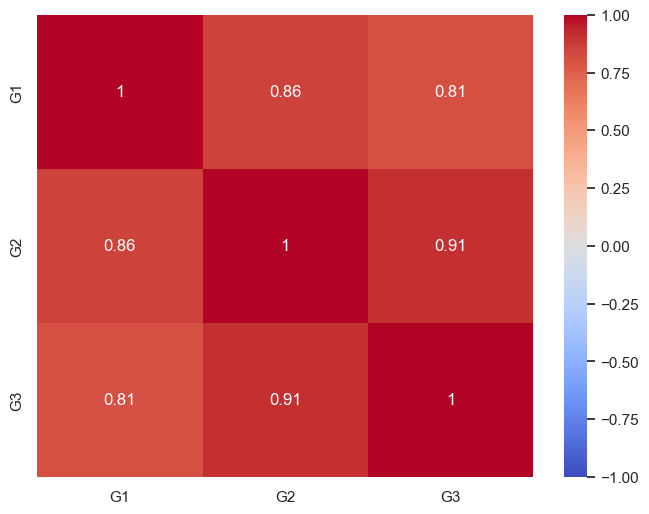

In [26]:
sns.set()
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(correlatiematrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1) 

Je ziet dat de correlatie tussen alle drie de afhankelijke variabelen heel hoog is en dat de correlatie tussen G2 en G3 het hoogst is.

## Numerieke onafhankelijke variabelen

### Correlatiematrix van de numerieke onafhankelijke variabelen

In [30]:
onafh_num_vars = df[num_vars]
onafh_num_vars_df = pd.DataFrame(onafh_num_vars)
correlatiematrix2 = onafh_num_vars_df.corr()
print(correlatiematrix2)

            failures  traveltime  studytime      Medu      Fedu    famrel  \
failures    1.000000    0.087177  -0.152024 -0.183530 -0.182261 -0.053676   
traveltime  0.087177    1.000000  -0.081328 -0.248706 -0.201236 -0.012578   
studytime  -0.152024   -0.081328   1.000000  0.085599  0.026173  0.012324   
Medu       -0.183530   -0.248706   0.085599  1.000000  0.637910 -0.005002   
Fedu       -0.182261   -0.201236   0.026173  0.637910  1.000000 -0.003365   
famrel     -0.053676   -0.012578   0.012324 -0.005002 -0.003365  1.000000   
freetime    0.102679   -0.007403  -0.094429 -0.004376 -0.006176  0.136901   
goout       0.074683    0.049740  -0.072941  0.031929  0.038699  0.080619   
Dalc        0.116336    0.109423  -0.159665  0.012260  0.008323 -0.076483   
Walc        0.107432    0.084292  -0.229073 -0.022781  0.023509 -0.100663   
health      0.048311   -0.029002  -0.063044 -0.003403  0.039886  0.104101   
age         0.288229    0.050863  -0.000320 -0.118024 -0.121120  0.004677   

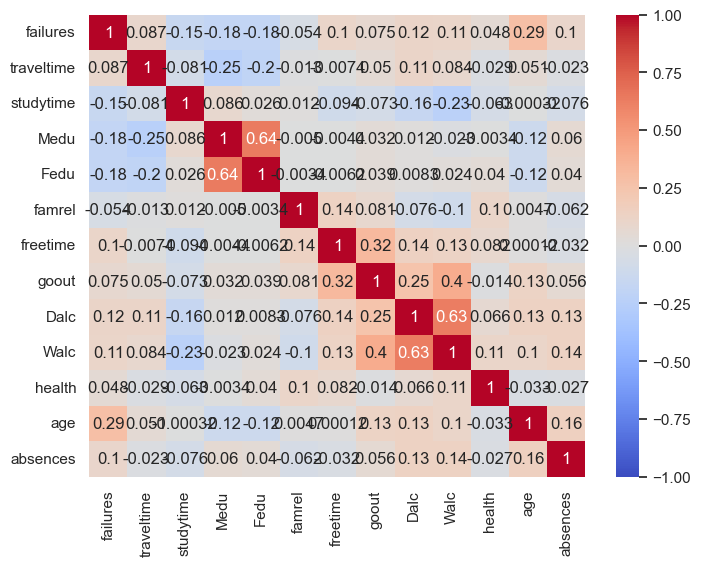

In [31]:
sns.set()
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(correlatiematrix2, annot=True, cmap='coolwarm', vmin=-1, vmax=1) 